# Chapter 1: Exploratory Data Analysis

    Overview: This chapter focuses on the first step of any data science project: epxloring the data.

## Data Structures
Two types of data structures:
* Unstructured data: Images, videos, Emails, Audio files
* Structured data: Relational databases, Spreadsheets, data tables (CSV, TSV), XML & JSON files

***Data Types***

There are two basic types of structure data: numeric and categorical.

* Numeric: Data expressed on a numeric scale
    * Continuous: Data that can take on any value in an interval 
        * Synonyms: interval, float, numeric
        * Examples: Time, meters, miles
    * Discrete: Data that can take only integer values
        * Synonyms: integer, count
        * Examples: Age, Number of students in a class, Number of rooms in a house

* Categorical: Data taht can take on only a specific set of values representing a set of possible categories (Synonyms: enums, enumerated, factors, nominal)
    * Binary: A special case of categorical data with just two categories of values
        * Synonyms: dichotomous, logical, indicator, boolean
        * Examples: 0 or 1, True or False
    * Ordinal: Categorical data that has an explicit ordering.
        * Synonyms: ordered factor
        * Examples: (Red, Green, or Blue), (Large, Medium, Small), (Cat, Dog, Mouse), Movie ratings, levels of pain

***Data Typing in Software***

Different software will handle data types differently. As a result, it's important to know your software and how it handles data types so that practitioners can appropriately conduct analyses.

***Key Terms for Rectangular Data***

Data Frame
* Rectangular data (like a spreadsheet) is the basic data structure for statistical and machine learning models.

Feature
* A column within a table is commonly referred to as a feature

Outcome
* Many data science projects involve predicting an *outcome* - often a yes/no outcome. The features are sometimes used to predict the *outcome* in an experiment or a study.
* Synonyms: dependent variable, response, target, otuput

Records
* A row within a table is commonly referred to as a *record*.
* Synonyms: case, example, instance, observation, pattern, sample

***Nonrectangular Data Structures***
* Time-series data
* Spacial data structures (mapping and location analytics)
* Graph data structures (physical, social, and abstract relationships)

## Estimates of Location
Estimates of location are variables with measured or coutn data that might have thousands of distinct values. A basic step in exploring your data is getting a "typical value" for each feature (variable): an estimate of where most of the data is located (i.e., its central tendancy).

**Key Terms for Estimates of Location**

Mean
>The sum of all values divided by the number of values.
>>Synonym: average

Weighted mean
>The sum of all values times a weight divided by the sum of the weights.
>>Synonym: weighted average

Median
>The value such that one-half of the data lies above and below.
>>Synonym: 50th percentile

Percentile
>The value such that *P* percent of the data lies below.
>>Synonym: quantile

Weighted median
>The value such that one-half of the sum of the weights lies above and below the sorted data.

Trimmed mean
>The average of all values after dropping a fixed number of extreme values.
>>Synonym: truncated mean

Robust
>Not sensitive to extreme values.
>>Synonym: resistant

Outlier
>A data value that is very different from most of the data.
>>Synonym: extreme value

**Mean**

$
\bar{x} = \frac{1}{n}\sum_{i=1}^{n} x_i
$

The most basic estimate of location is the mean, or *average* value. The mean is the sum of all values divided by the number of values. Consider the following set of numbers: {3, 5, 1, 2}. 

The mean is 
= (3 + 5 + 1 + 2) / 4 
= 11 / 4
= 2.75

**Trimmed mean**

$ \bar{x} = \dfrac{\displaystyle\sum_{i=p+1}^{\,n-p} x_{(i)}}{n - 2p} $

A variation of the mean is a *trimmed mean*, which you calculate by dropping a fixed number of sorted values at each end and then taking an average of the remaining values. Representing the sorted values by $x_{(1)}, x_{(2)}... x_{(n)}$ where $x_{(1)}$ is the smallest value and $x_{(n)}$ is the largest.

A trimmed mean eliminates the influence of extreme values. For example, in international diving the top and bottom scores from five judges are dropped, and the final score is the average of the scores from the three remaining judges. This makes it difficult for a single judge to manipulate the score, perhaps to favor their country's contestant. Trimmed means are widely used, and in many cases are preferable to using the ordinary mean. 

**Weighted Mean**

$ \bar{x}_w = \dfrac{\displaystyle\sum_{i=1}^{n} w_i x_i}{\displaystyle\sum_{i=1}^{n} w_i} $

Another type of mean is a *weighted mean*, which you calculate by multiplying each data value $x_{(i)}$ by a user-specified weight $w_{(i)}$ and dividing their sum by the sum of the weights. 

There are two (2) main motivations for using a weighted mean:
1. Some values are intrinsically more variable than others, and highly variable observations are given a lower weight. For example, if we are taking the average from multiple sensors and one of the sensors is less accurate, then we might downweight the data from that sensor.
2. The data collected does not equally represent the different groups that we are interested in measuring. For example, because of the way an online experiment was conducted, we may not have a set of data that accurately reflects all groups in the user base. To correct that, we can give a higher weight to the values from the groups that were underrepresented. 

**Median and Robust Estimates**

The *median* is the middle number on a sorted list of the data. If there is an even number of data values, the middle value is one that is not actually in the data set, but rather the average of the two values that divide the sorted data into upper and lower halves. Compared to the mean, which uses all observations, the median depends only on the values in the center of the sorted data. While this might seem to be a disadvantage, since the mean is much more sensitive to the data, there are many instances in which the median is a better metric for estimating location. Let's say we want to look at typical household incomes in neighborhoods around Lake Washington in Seattle. In comparing the Medina neighborhood to the Windermere neighborhood, using the mean would produce very different results because Bill Gates lives in Medina. If we use the median, it won't matter how rich Bill Gates is - the position of the middle observation will remain the same.

For the same reasons one uses a weighted mean, it's also possible to compute a *weighted median*. As with the median, we first sort the data, although each data value has an associated weight. Instead of the middle number, the weighted median is a value such that the sum of the weights is equal for the lower and upper halves of the sorted list. Like the median, the weighted median is robust to outliers.

**Outliers**

The median is referred to as a *robust* estimate of location since it's not influenced by *outliers* (extreme cases) that could skew the results. An outlier is any value that is very distant from the other values in a data set. 

An outlier itself doesn't make a data value invalid or erroneous (like the Bill Gates example). Still, outliers are often the result of data errors such as mixing data of different units (kilometers vs. meters) or bad readings from a sensor. When outliers are the result of bad data, the mean will result in a poor location estimate, while the median will still be valid. In any case, outliers should be identified and are usually worthy of further investigation.

> Anomaly Detection
>>In contrast to typical data analysis, where outliers are somtimes informative and sometimes a nuisance, in *anomaly detection* the points of interest are the outliers, and the greater mass of data serves primarily to define the "normal" against which anomalies are measured.

In [19]:
import pandas as pd
from scipy import stats

In [8]:
state_df = pd.read_csv("/Users/brian.v.nguyen/projects/practical_statistics_for_data_scientists/data/state.csv")
state_df.head(5)

,State,Population,Murder.Rate,Abbreviation
0,Alabama,4779736,5.7,AL
1,Alaska,710231,5.6,AK
2,Arizona,6392017,4.7,AZ
3,Arkansas,2915918,5.6,AR
4,California,37253956,4.4,CA


Compute the mean, trimmed mean, and median for the population

In [ ]:
avg = state_df['Population'].mean()
med = state_df['Population'].median()
trimmed_avg = stats.trim_mean(state_df['Population'], 0.1)

print(f"Average: {avg}")
print(f"Median: {med}")
print(f"Trimmed Average: {trimmed_avg}")

Average: 6162876.3
Median: 4436369.5
Trimmed Average: 4783697.125


Compute the weighted average murder rate

In [23]:
import numpy as np
import wquantiles # pip3 install wquantiles

In [27]:
np_weighted_avg_murder_rate = np.average(
    state_df['Murder.Rate'],
    weights=state_df['Population']
    )

wquantiles_weighted_avg_murder_rate = wquantiles.median(
    state_df['Murder.Rate'],
    weights=state_df['Population']
    )

print(f"Weighted Avg. Murder Rate using NumPy: {np_weighted_avg_murder_rate}")
print(f"Weighted Avg. Murder Rate using wquantiles: {wquantiles_weighted_avg_murder_rate}")

Weighted Avg. Murder Rate using NumPy: 4.445833981123393
Weighted Avg. Murder Rate using wquantiles: 4.4


## Estimates of Variability

Location is just one dimension of summarizing a feature. A second dimension, variability, also referred to as *dispersion*, measures whether the data values are tightly clustered or spread out. At the heart of statistics lies variability: measuring it, reducing it, distinguishing random from real variability, identifying the various sources of real variability, and making decisions in the presence of it.

**Key Terms for Estimates of Variability**

Deviations
>The difference between the observed values and the estimate of location.
>>Synonym: errors, residuals

Variance
>The sum of squared deviations form the mean divided by n - 1, where *n* is the number of data values.
>>Synonym: mean-squared-error

Standard deviation
>The square root of the variance.

Mean absolute deviation
>The mean of the absolute values of the deviations from the mean.
>>Synonym: l1-norm, Manhattan norm

Median absolute deviation from the median
>The median of the absolute values of the deviations from the mean.

Range
>The difference between the largest and the smallest value in a data set.

Order statistics
>Metrics based on the data values sorted from smallest to biggest.
>>Synonym: ranks

Percentile
>The value such that *P* percent of the values take on this value or less and (100 - P) percent take on this value or more.
>>Synonym: quantile

Interquartile range
>The difference between the 75th percentile and the 25th percentile.
>>Synonym: IQR

**Standard Deviation and Related Estimates**

The most widely used estimates of variation are based on the differences, or *deviations*, between the estimate of location and the observed data. For a set of data {1, 4, 4}, the mean is 3 and the median is 4. The deviations from the mean are the differences: 1 - 3 = -2, 4 - 3 = 1, 4 - 3 = 1.

These deviations tell us how dispersed the data is around the central value.

One way to measure variability is to estimate a typical value for these deviations. Averaging the deviations themselves would not tell us much - the negative deviations offset the positive ones. In fact, the sum of the deviations from the mean is precisely zero. Instead, a simple approach is to take the average of the absolute values of the deviations from the mean. In the preceding example, the absolute value of the deviations is {2, 1, 1}, and their average is (2+1+1) / 3 = 1.33. This is known as the *mean absolute deviation* and is computed with the formula:

$ \text{Mean absolute deviation} = \frac{\displaystyle\sum_{i=1}^{n} \left| x_i - \bar{x} \right|}{n} $

where $x$ is the sample mean.


Best-known estimates of variability:
* Variance: an average of the squared deviations
* Standard deviation: square root of the variance

$ \text{Variance} = s^2 = \frac{\displaystyle\sum_{i=1}^{n} (x_i - \bar{x})^2}{n - 1} $

$ \text{Standard deviation} = s = \sqrt{\text{Variance}} $


The standard deviation is easier to interpret than the variance since it is on the same scale as the original data. Still, with its more complicated and less intuitive formula, it might seem peculiar that the standard deviation is preferred in statistics over the mean absolute deviation. It owes preeiminence to statistical theory: mathematically, working with squared values is more convenient than absolute values, especially for statistical models.

Neither the variance, standard deviation, nor the mean absolute deviation is robust to outliers and extreme values. The variance and standard deviation are especially sensitive to outliers since they are based on squared deviations. 

A robust estimate of variability is the *mean absolute deviation from the median* or MAD: 
$ \text{Median absolute deviation} = \text{Median} \left( |x_1 - m|,\ |x_2 - m|,\ \ldots,\ |x_n - m| \right) $

where $m$ is the median. Like the median, the MAD is not influenced by extreme values. It's also possible to compute a trimmed standard deviation analogous to the trimmed mean.

## Estimates Based on Percentiles

A different approach to estimating dispersion is based on looking at the spread of the sorted data. Statistics based on sorted(ranked) data are referred to as *order statistics*. 

Basic --> range: the difference between the largest and smallest numbers

Finding the minimum and maximum values is useful, but the range is extremely sensitive to outliers and it's not very useful as a general measure of dispersion in the data.

To avoid the sensitivity of outliers, we can look at the range of the data after dropping values from each end i.e. *percentiles*. In a data set, the *P*th percentile is a value such that at least *P* percent of the values take on this value or less and at least (100 - P) percent of the values take on this value or more. For example, to find the 80th percentile:
1. Sort the data
2. Start with the smallest value
3. Proceed to 80% of the way to the largest value

>Note: Median is the same as the 50th percentile

The percentile is the same as a quantile, with quantiles indexed by fractions (so .8 quantile is the same as the 80th percentile)

A common measurement of variability is the *interquartile range (or IQR)*: the difference between the 25th & 75th percentile.

**Example: Variability Estimates of State Population**

Compute the standard deviation, 25th Percentile, 75th Percentile, IQR, and robust MAD

In [33]:
import statsmodels
from statsmodels.robust.scale import mad

In [41]:
population_std = state_df['Population'].std()
population_25_percentile = state_df['Population'].quantile(0.25)
population_75_percentile = state_df['Population'].quantile(0.75)
pop_iqr = population_25_percentile - population_75_percentile
population_mad = mad(state_df['Population']) 

print(f"Standard Deviation:  {population_std}")
print(f"25th Percentile:     {population_25_percentile}")
print(f"75th Percentile:     {population_75_percentile}")
print(f"Interquartile Range: {pop_iqr}")
print(f"Robust MAD:          {population_mad}")


Standard Deviation:  6848235.347401142
25th Percentile:     1833004.25
75th Percentile:     6680312.25
Interquartile Range: -4847308.0
Robust MAD:          3849876.1459979336


**Key Takeaways**
> Variance and standard deviation are the most widespread and routinely reported statistics of variability

> Both are sensitive to outliers

> More robust metrics include mean absolute deviation, median absolute deviation from the median, and percentiles (quantiles)

## Exploring the Data Distribution

Each of the above estimates sums up the data in a single number to describe the location or variability of the data. It's also useful to explore how the data is distributed overall.

**Key Terms for Exploring the Distribution**

Boxplot
- A plot introduced by Tukey as a quick way to visualize the distribution of the data
- Synonym: box and wiskers plot

Frequency table
- A tally of the count and numeric data values that fall into a set of intervals (bins)

Histogram
- A plot of the frequency table with the bins on the x-axis and the count (or proportion) on the y-axis. While visually similar, bar charts should not be confused with histograms. 

Density plot
- A smoothed version of the histogram, often based on a *kernal density estimate*.

**Percentiles and Boxplots**

Percentiles
- Valuable for summarizing the entire distribution
- Quartiles (25th, 50th, 75th percentiles)
- Deciles (10th, 20th,..., 90th percentiles)
- Valuable for summarizing the *tails* (outer range) of the distribution

In [45]:
state_df['Murder.Rate'].quantile([0.05, 0.25, 0.5, 0.75, 0.95])

0.05    1.600
0.25    2.425
0.50    4.000
0.75    5.550
0.95    6.510
Name: Murder.Rate, dtype: float64

> The median is 4 murders per 100,000 people, although there is quite a bit of variability: the 5th percentile is only 1.6 and the 95th percentile is 6.51.

Text(0, 0.5, 'Population (millions)')

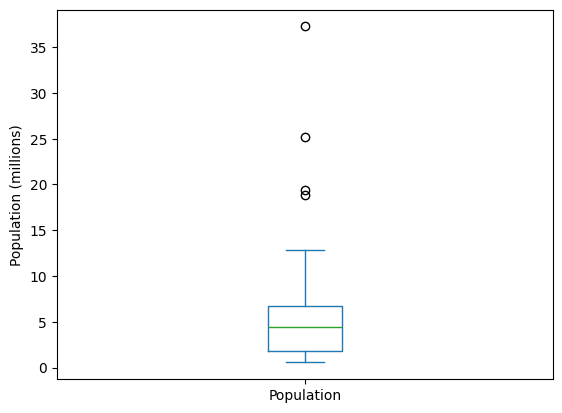

In [46]:
ax = (
    state_df['Population']/1_000_000
).plot.box()

ax.set_ylabel('Population (millions)')

> From this boxplot we can immediately see that the median state population is about 5 million, half the states fall between about 2 and 7 million, and there are some high population outliers. The top and bottom of the box are the 75th and 25th percentiles, respectively. The median is shown by the horizontal line in the box. The lines, or *whiskers*, extend from the top and bottom fo the box to indicate the range for the bulk of the data. There are many variations of a boxplot. By default, *Matplotlib* extends the whiskers to the furthest point beyond the box, except that it will not go beyond 1.5 times the IQR. Any data outside of the whiskers is plotted as single points or circles (often considered as outliers).